In [ ]:
from google.colab import files

uploaded = files.upload()


Saving Amazonsalesdata1.csv to Amazonsalesdata1.csv


In [ ]:
import pandas as pd

df = pd.read_csv('Amazonsalesdata1.csv')

In [ ]:
df.head()

Region Country Item Type Sales Channel  \
0         Australia and Oceania    Fiji   Clothes       Offline   
1            Sub-Saharan Africa    Mali    Fruits        Online   
2            Sub-Saharan Africa    Mali   Clothes        Online   
3  Middle East and North Africa   Syria    Fruits        Online   
4            Sub-Saharan Africa  Zambia    Snacks        Online   

  Order Priority  Order Date  Month  Year   Order ID   Ship Date  Units Sold  \
0              C  30-06-2010      6  2010  647876489  08-01-2010        9905   
1              L  05-07-2010      7  2010  686048400  05-10-2010        5822   
2              M  26-07-2011      7  2011  512878119  09-03-2011         888   
3              L  22-11-2011     11  2011  162052476  12-03-2011        3784   
4              L  01-04-2011      4  2011  122583663  01-05-2011        4085   

   Unit Price  Unit Cost  Total Revenue  Total Cost  Total Profit  
0      109.28      35.84     1082418.40  1582243.50     951410.50  
1        9.33       6.92       54319.26   328376.44     248406.36  
2      109.28      35.84       97040.64   933903.84     224598.75  
3        9.33       6.92       35304.72    56065.84      19525.82  
4      152.58      97.44      623289.30  2657347.52     639077.50

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('Amazonsalesdata1.csv')

In [ ]:
data.head(1)

Region Country Item Type Sales Channel Order Priority  \
0  Australia and Oceania    Fiji   Clothes       Offline              C   

   Order Date  Month  Year   Order ID   Ship Date  Units Sold  Unit Price  \
0  30-06-2010      6  2010  647876489  08-01-2010        9905      109.28   

   Unit Cost  Total Revenue  Total Cost  Total Profit  
0      35.84      1082418.4   1582243.5      951410.5

In [ ]:
data.shape

(100, 16)

In [ ]:
data.describe()

Month         Year      Order ID   Units Sold  Unit Price  \
count  100.000000   100.000000  1.000000e+02   100.000000  100.000000   
mean     6.530000  2013.230000  5.550204e+08  5128.710000  276.761300   
std      3.220688     2.088231  2.606153e+08  2794.484562  235.592241   
min      1.000000  2010.000000  1.146066e+08   124.000000    9.330000   
25%      4.000000  2012.000000  3.389225e+08  2836.250000   81.730000   
50%      7.000000  2013.000000  5.577086e+08  5382.500000  179.880000   
75%      9.000000  2015.000000  7.907551e+08  7369.000000  437.200000   
max     12.000000  2017.000000  9.940222e+08  9925.000000  668.270000   

        Unit Cost  Total Revenue    Total Cost  Total Profit  
count  100.000000   1.000000e+02  1.000000e+02  1.000000e+02  
mean   191.048000   1.373488e+06  9.318057e+05  4.416820e+05  
std    188.208181   1.460029e+06  1.083938e+06  4.385379e+05  
min      6.920000   4.870260e+03  3.612240e+03  1.258020e+03  
25%     35.840000   2.687212e+05  1.688680e+05  1.214436e+05  
50%    107.275000   7.523144e+05  3.635664e+05  2.907680e+05  
75%    263.330000   2.212045e+06  1.613870e+06  6.358288e+05  
max    524.960000   5.997055e+06  4.509794e+06  1.719922e+06

In [ ]:
columns = list(data)

In [ ]:
columns

['Region',
 'Country',
 'Item Type',
 'Sales Channel',
 'Order Priority',
 'Order Date',
 'Month',
 'Year',
 'Order ID',
 'Ship Date',
 'Units Sold',
 'Unit Price',
 'Unit Cost',
 'Total Revenue',
 'Total Cost',
 'Total Profit']

In [ ]:
(data[columns[1:15]]==0).sum()

Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Month             0
Year              0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
dtype: int64

In [ ]:
data[columns[1:15]]=data[columns[1:15]].replace(0,np.nan)

In [ ]:
data.shape

(100, 16)

In [ ]:
data.dropna(inplace = True)

In [ ]:
data.shape

(100, 16)

In [ ]:
# Convert 'Order Date' column to datetime, coercing errors
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')

# Check for errors after conversion
errors = data['Order Date'].isnull().sum()
print("Number of conversion errors:", errors)

# Drop rows with NaT values if necessary
data.dropna(subset=['Order Date'], inplace=True)

# Extract year and month components
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month


Number of conversion errors: 0


<ipython-input-17-2f5e7a151049>:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')


In [ ]:
conversion_errors = data[data['Order Date'].isnull()]
print(conversion_errors)


Empty DataFrame
Columns: [Region, Country, Item Type, Sales Channel, Order Priority, Order Date, Month, Year, Order ID, Ship Date, Units Sold, Unit Price, Unit Cost, Total Revenue, Total Cost, Total Profit]
Index: []


In [ ]:
# Drop rows with invalid dates
data.dropna(subset=['Order Date'], inplace=True)


In [ ]:
# Fill missing dates with a default value
data['Order Date'].fillna(pd.Timestamp('1900-01-01'), inplace=True)


In [ ]:
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')


In [ ]:
data['Order Date']

0    2010-06-30
1    2010-07-05
2    2011-07-26
3    2011-11-22
4    2011-04-01
        ...    
95   2014-02-08
96   2015-07-14
97   2012-08-22
98   2013-08-18
99   2015-08-14
Name: Order Date, Length: 100, dtype: datetime64[ns]

In [ ]:
import seaborn as sns

sns.distplot(data['Total Profit'])

<ipython-input-23-e45e6db13dac>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Total Profit'])


<Axes: xlabel='Total Profit', ylabel='Density'>

In [ ]:
data[data.duplicated()]

Empty DataFrame
Columns: [Region, Country, Item Type, Sales Channel, Order Priority, Order Date, Month, Year, Order ID, Ship Date, Units Sold, Unit Price, Unit Cost, Total Revenue, Total Cost, Total Profit]
Index: []

In [ ]:
import numpy as np

Q1 = np.percentile(df["Total Profit"], 25)


In [ ]:
Q1

121443.58499999999

In [ ]:
import numpy as np

Q3 = np.percentile(df["Total Profit"], 75)


In [ ]:
Q3

635828.8

In [ ]:
IQR = Q3 - Q1

In [ ]:
IQR

514385.2150000001

In [ ]:
low = Q1 - 1.5 * IQR
upp = Q3 + 1.5 * IQR

low, upp

(-650134.2375000002, 1407406.6225)

In [ ]:
otuliers =[]

In [ ]:
outliers = []

for i in df["Total Profit"]:
    if (i > upp) or (i < low):
        outliers.append(i)


In [ ]:
outliers

[1487261.02, 1505888.07, 1541705.29, 1719922.04, 1678540.98]

In [ ]:
outliers = []

for i in df["Total Profit"]:
  if i not in outliers:
    print(i)



951410.5
248406.36
224598.75
19525.82
639077.5
285087.64
693911.51
510216.66
152114.2
584073.87
7828.12
306097.92
606834.72
1487261.02
122819.06
122865.12
1208744.24
85033.8
634745.9
337937.6
714157.0
122029.78
122686.5
5270.67
127054.2
315574.05
13009.18
14031.02
80241.84
392780.1
1505888.07
53252.5
369155.0
1367272.5
404010.78
160609.54
9119.44
272672.4
846885.0
503358.75
75555.9
1257775.58
187545.03
10795.23
435499.2
85223.58
1541705.29
6841.38
575916.48
159832.5
166635.36
23150.46
359941.17
436446.25
18405.17
255718.08
727423.2
495007.89
46735.86
1254472.05
60418.38
455335.0
696647.5
449159.04
296448.35
778415.99
216919.36
403773.12
1046233.75
539196.48
632512.5
1621.93
89904.06
766835.04
1719922.04
1152486.42
146875.14
235601.16
825738.04
1678540.98
747939.49
579000.96
1128242.43
225246.9
407630.41
160935.32
138262.14
532885.74
1258.02
72975.6
119685.0
147031.74
255151.25
1375311.7
127722.96
65214.72
15103.47
93748.05
144521.02
889472.91


In [ ]:
df["Total Profit"] = [i for i in df["Total Profit"] if i not in outliers]

In [ ]:
df["Total Profit"]

0     951410.50
1     248406.36
2     224598.75
3      19525.82
4     639077.50
        ...    
95     65214.72
96     15103.47
97     93748.05
98    144521.02
99    889472.91
Name: Total Profit, Length: 100, dtype: float64

In [ ]:
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt

#index = np.arange(len(data))
#plt.bar(index, df["Units Sold"], width = 0.2, color = 'c', edgecolor = 'r', linewidth = 5)
##plt.bar(index + 0.2, df["Unit Cost"], width = 0.2, color = 'k', edgecolor = 'c', linewidth = 5)
#plt.bar(index + 0.4, df["Total Profit"], width = 0.2, color = 'w', edgecolor = 'y', linewidth = 5)
#plt.title("Bar Plot")
#plt.show()

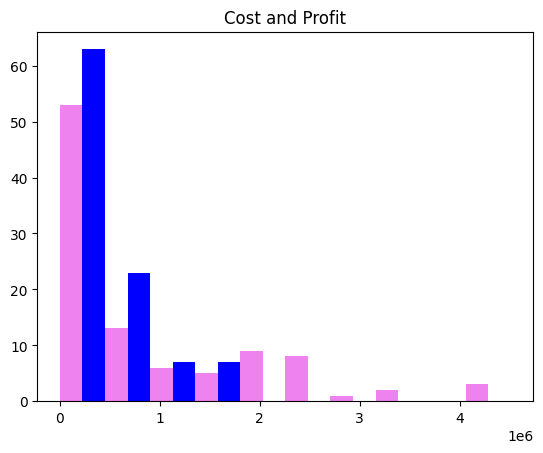

In [ ]:
import matplotlib.pyplot as plt

plt.hist([df["Total Cost"], df["Total Profit"]], rwidth = 1, histtype = 'bar', color = ['violet','b'],label = ['Total Cost','Total Profit'])
plt.title("Cost and Profit")
plt.show()

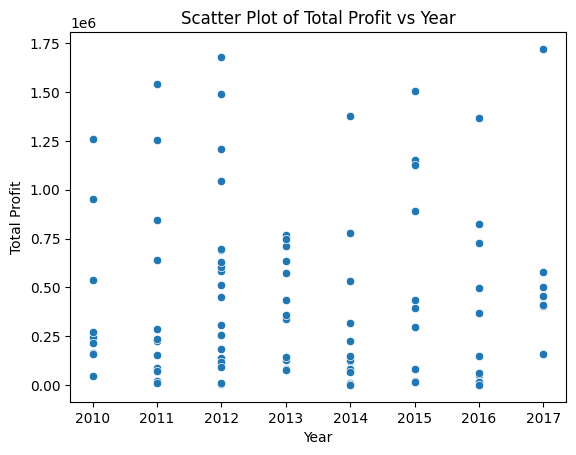

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Year', y='Total Profit', data=df)
plt.title('Scatter Plot of Total Profit vs Year')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Month', y='Total Profit', data=df)
plt.title('Scatter Plot of Total Profit vs Month')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.show()


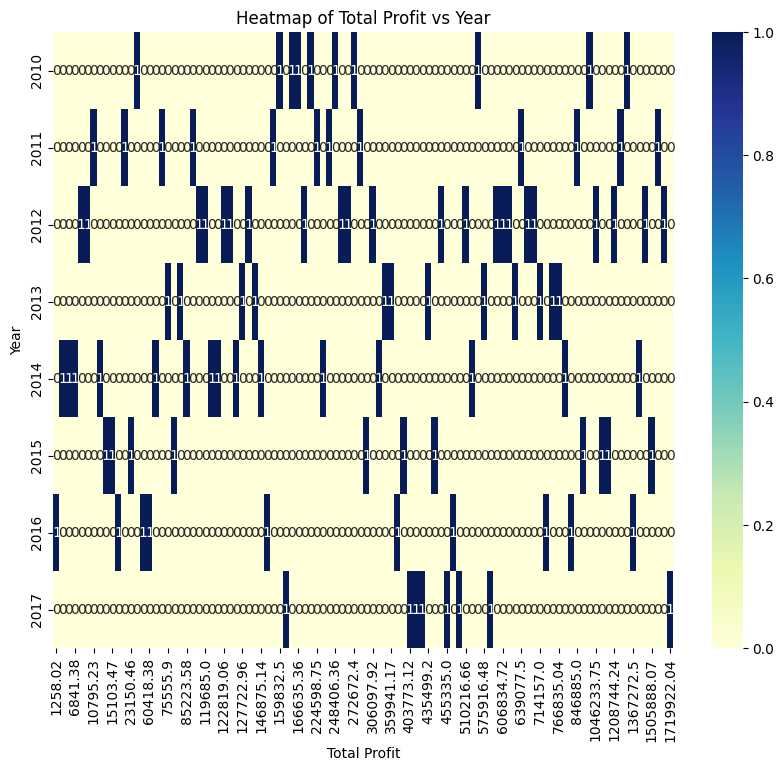

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_data = df.pivot_table(index='Year', columns='Total Profit', values=None, aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt="d")
plt.title('Heatmap of Total Profit vs Year')
plt.xlabel('Total Profit')
plt.ylabel('Year')
plt.show()


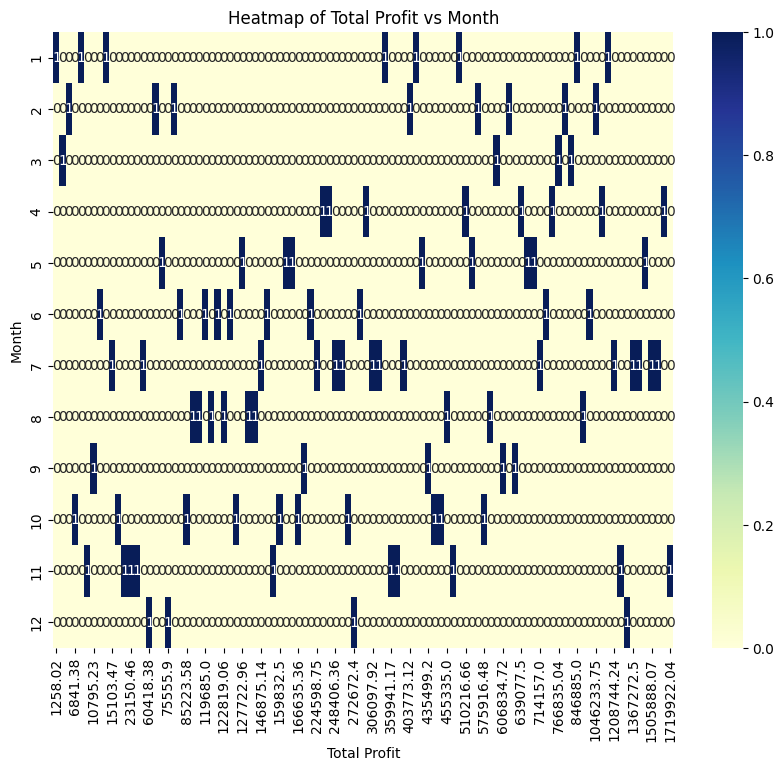

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_data = df.pivot_table(index='Month', columns='Total Profit', values=None, aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt="d")
plt.title('Heatmap of Total Profit vs Month')
plt.xlabel('Total Profit')
plt.ylabel('Month')
plt.show()


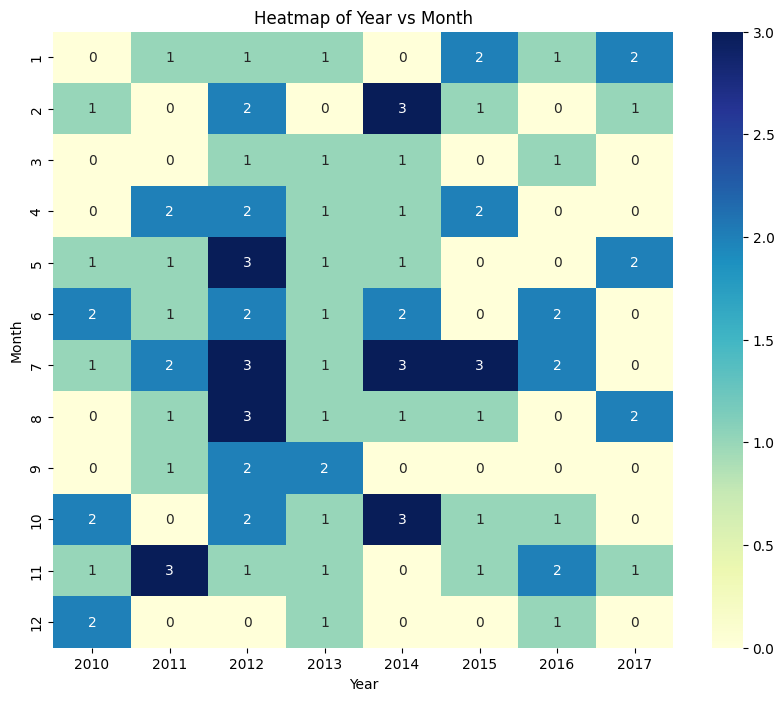

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_data = df.pivot_table(index='Month', columns='Year', values=None, aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt="d")
plt.title('Heatmap of Year vs Month')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()


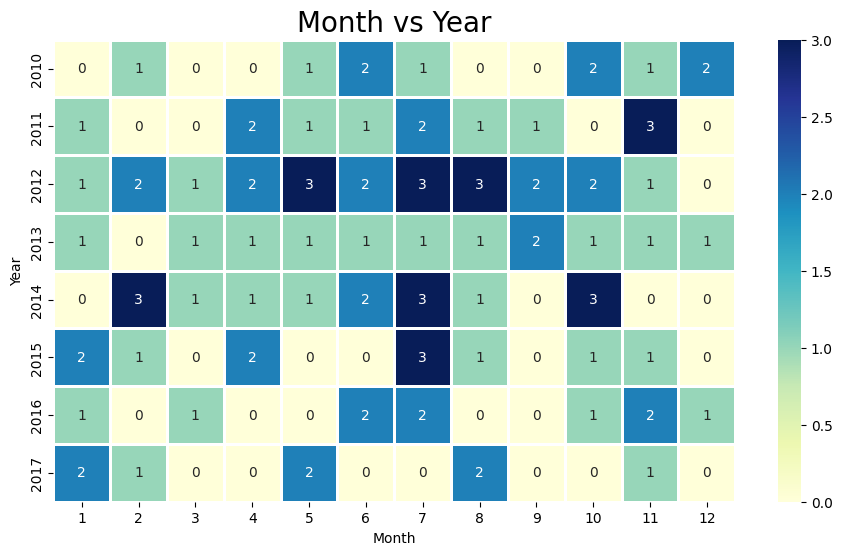

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = data[['Month', 'Year']]

pivot_table = df.pivot_table(index='Year', columns='Month', aggfunc=len, fill_value=0)

plt.figure(figsize=(11, 6))
sns.heatmap(pivot_table, annot=True, linewidth=1, cmap='YlGnBu')
plt.title('Month vs Year', fontsize=20)
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


In [ ]:
data.groupby('Region')[['Units Sold']].count()

Units Sold
Region                                       
Asia                                       11
Australia and Oceania                      11
Central America and the Caribbean           7
Europe                                     22
Middle East and North Africa               10
North America                               3
Sub-Saharan Africa                         36

from matplotlib import pyplot as plt
_df_0['Units Sold'].plot(kind='hist', bins=20, title='Units Sold')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Units Sold'].plot(kind='line', figsize=(8, 4), title='Units Sold')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
data.groupby('Sales Channel')[['Total Profit']].count()

Total Profit
Sales Channel              
Offline                  50
Online                   50

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Total Profit']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Total Profit'}, axis=1)
              .sort_values('Total Profit', ascending=True))
  xs = counted['Total Profit']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Total Profit', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Total Profit')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('Sales Channel').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Total Profit']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Total Profit'}, axis=1)
              .sort_values('Total Profit', ascending=True))
  xs = counted['Total Profit']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('Total Profit', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Sales Channel')):
  _plot_series(series, series_name, i)
  fig.legend(title='Sales Channel', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Total Profit')
_ = plt.ylabel('count()')

In [ ]:
import pandas as pd

df = pd.read_csv('Amazonsalesdata1.csv')

print(df['Sales Channel'].head())
data.groupby('Sales Channel')[['Units Sold']].count()


0    Offline
1     Online
2     Online
3     Online
4     Online
Name: Sales Channel, dtype: object


Units Sold
Sales Channel            
Offline                50
Online                 50

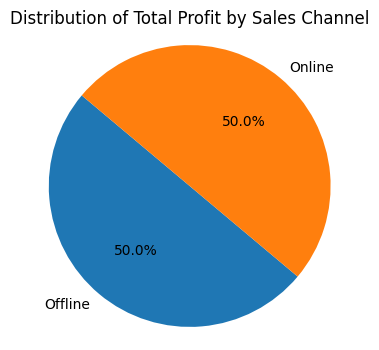

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Amazonsalesdata1.csv')

profit_counts = df.groupby('Sales Channel')['Total Profit'].count()

plt.figure(figsize=(4,4))
plt.pie(profit_counts, labels=profit_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Total Profit by Sales Channel')
plt.axis('equal')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Amazonsalesdata1.csv')

region_counts = df['Region'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Regions')
plt.axis('equal')
plt.show()
